In [1]:
import urllib.request as urllib
import io
import zipfile
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## what i will do
i want to test whehter my method's accuracy is better than the old meathods(AA,RA,...) or not
so i need a dataset to do experiment

the edge predict method use the dataset of all edges join with the same-nums false-edge dataset

the old methods just take the whole graph as the dataset,and give score to all possible edge

test dataset is a subset of edge predict method's dataset


# download the data from the internet

In [2]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.urlopen(url)  # open an url
s = io.BytesIO(sock.read())  # read BytesIO file
sock.close()

zf = zipfile.ZipFile(s)  # ZipFile object
# txt = zf.read('football.txt').decode()  # read txt
gml = zf.read('football.gml').decode()  #  read gml data
# delete the first line
gml = gml.split('\n')[1:]
G = nx.parse_gml(gml)  # release gml数据
'''-----------------read data over-------------------'''
# print(txt)
# 打印每个队的度——比赛的数量
# for n, d in G.degree():
#     print('%s %d' % (n, d))

'-----------------read data over-------------------'

# visualize the graph

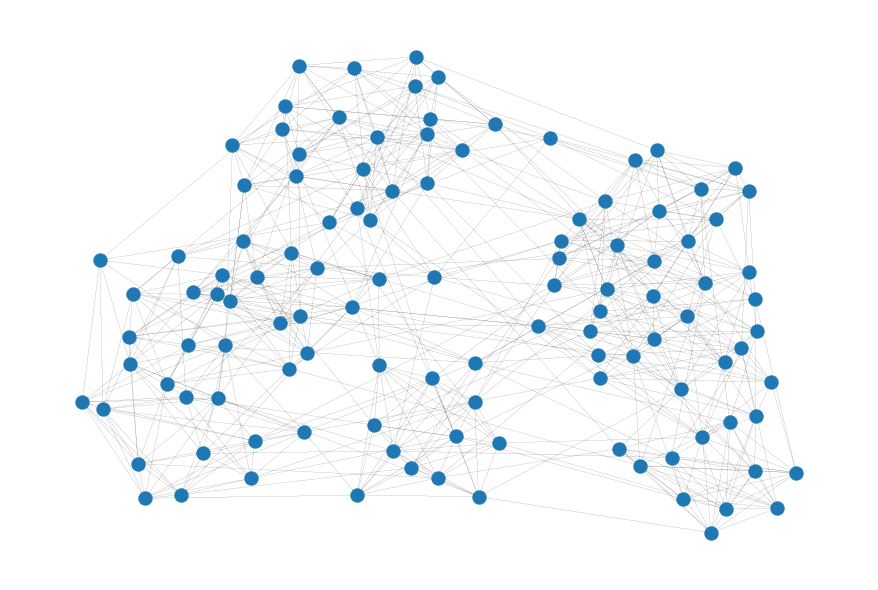

In [3]:
options = {
    # 'node_color': 'black',
    'node_size': 200,
    # 'line_color': 'grey',
    'linewidths': 0.2,
    'width': 0.1,
}
# Find key-values for the graph
pos = nx.spring_layout(G)
plt.figure(figsize=[12,8])
nx.draw(G, **options,cmap = plt.get_cmap('rainbow'), pos=pos, with_labels=False)

# print information of the graph

In [4]:
n = G.number_of_nodes()
m = G.number_of_edges()
print("Number of nodes :", str(n))
print("Number of edges :", str(m))
print("Number of connected components :" ,str(nx.number_connected_components(G)))


Number of nodes : 115
Number of edges : 613
Number of connected components : 1


---

对于无向图而言，115个节点理论上能产生$115*(115-1)/2=6555$条边

那么$D_1$=613，$D_2$=6555-613=5942

首先，先把$D_1$和$D_2$边数据集构造出来

##  构建$D1$

In [14]:
D1=list(G.edges)

##  构建$D2$

In [30]:
node_list=list(G.nodes)
D2=[]
for i in range(len(node_list)):
    for j in range(i+1,len(node_list)):
        source,target=node_list[i],node_list[j]
        D2.append((source,target))
# ok，D1,D2构建正常
len(set(D2)&set(D1))

613

---

# and then, i want to use these edges to make dataset

In [6]:
# num of common neighbors of a and b
def num_common_neighbors(a,b):
    return len(list(nx.common_neighbors(G,a,b)))
# num of neighbors of a/b
def num_neighbors(node):
    return len(list(nx.all_neighbors(G,node)))
# total degrees of neighbors of a/b
def total_degrees_of_neighbors(node):
    sum_degree=0
    for neighbor in sorted(nx.all_neighbors(G,node)):
        sum_degree = sum_degree + len(list(nx.all_neighbors(G,neighbor)))
    return sum_degree
# num of nodes in the path from a to b
def num_node_path(a,b): 
    return len(nx.shortest_path(G,source=a,target=b))
# total dergees of common neighbors of a and b
def total_degrees_of_common_neighbors(a,b):
    sum_degree_common=0
    for neighbor in sorted(nx.common_neighbors(G,a,b)):
        sum_degree_common = sum_degree_common + len(list(nx.all_neighbors(G,neighbor)))
    return sum_degree_common


# edge dataset

In [7]:
'''an edge is a sample'''
edges=list(G.edges())
# a
source=[x[0] for x in edges]
# b
target=[x[1] for x in edges]
# num of common neighbors of a and b
common_neighbors=[num_common_neighbors(x[0],x[1]) for x in edges]
# num of neighbors of a
neighbor_a=[num_neighbors(x) for x in source]
# num of neighbors of b
neighbor_b=[num_neighbors(x) for x in target]
# total degrees of neighbors of a
totoal_degree_neighbors_a=[total_degrees_of_neighbors(x) for x in source]
# total degrees of neighbors of b
totoal_degree_neighbors_b=[total_degrees_of_neighbors(x) for x in target]
# num of nodes in the path from a to b
node_path=[num_node_path(x[0],x[1]) for x in edges]
# total dergees of common neighbors of a and b
total_degree_common_neighbor=[total_degrees_of_common_neighbors(x[0],x[1]) for x in edges]


# make false-edge dataset

In [8]:
# # create disconnected sample(edge)
# def create_disconnected_edge(graph,num_sample):
#     num_nodes=graph.number_of_nodes()
#     exist_edges=list(graph.edges())
#     node_list=list(G.nodes())
#     edge_set=[]
#     counts=0
#     while counts < num_sample:
#         indA=np.random.randint(0,num_nodes)
#         indB=np.random.randint(0,num_nodes)
#         while indA==indB:
#             indB=np.random.randint(0,num_nodes) 
#         a=node_list[indA]
#         b=node_list[indB]
#         tmp_edge=(a,b)
#         # if (a,b) is exist, (b,a) will be desserted
#         tmp_edge_re=(b,a)
#         if tmp_edge in exist_edges or tmp_edge in edge_set or\
#             tmp_edge_re in exist_edges or tmp_edge_re in edge_set :
#             continue
#         edge_set.append(tmp_edge)
#         counts=counts+1
#     return edge_set

In [9]:
'''an edge is a sample'''
disconnect_edge=create_disconnected_edge(G,G.number_of_edges())
# a
source_=[x[0] for x in disconnect_edge]
# b
target_=[x[1] for x in disconnect_edge]
# num of common neighbors of a and b
common_neighbors_=[num_common_neighbors(x[0],x[1]) for x in disconnect_edge]
# num of neighbors of a
neighbor_a_=[num_neighbors(x) for x in source_]
# num of neighbors of b
neighbor_b_=[num_neighbors(x) for x in target_]
# total degrees of neighbors of a
totoal_degree_neighbors_a_=[total_degrees_of_neighbors(x) for x in source_]
# total degrees of neighbors of b
totoal_degree_neighbors_b_=[total_degrees_of_neighbors(x) for x in target_]
# num of nodes in the path from a to b
node_path_=[num_node_path(x[0],x[1]) for x in disconnect_edge]
# total dergees of common neighbors of a and b
total_degree_common_neighbor_=[total_degrees_of_common_neighbors(x[0],x[1]) for x in disconnect_edge]


In [10]:
# # create the dataframe
# df_graph_connect=pd.DataFrame({
#     'source':source,
#     'target':target,
#     'common_neighbors':common_neighbors,
#     'neighbor_a':neighbor_a,
#     'neighbor_b':neighbor_b,
#     'totoal_degree_neighbors_a':totoal_degree_neighbors_a,
#     'totoal_degree_neighbors_b':totoal_degree_neighbors_b,
#     'node_path':node_path,
#     'total_degree_common_neighbor':total_degree_common_neighbor,
#     'class':[1]*len(edges)
# })

# df_graph_disconnect=pd.DataFrame({
#     'source':source_,
#     'target':target_,
#     'common_neighbors':common_neighbors_,
#     'neighbor_a':neighbor_a_,
#     'neighbor_b':neighbor_b_,
#     'totoal_degree_neighbors_a':totoal_degree_neighbors_a_,
#     'totoal_degree_neighbors_b':totoal_degree_neighbors_b_,
#     'node_path':node_path_,
#     'total_degree_common_neighbor':total_degree_common_neighbor_,
#     'class':[0]*len(disconnect_edge)
# })

In [11]:
df_graph_disconnect

,source,target,common_neighbors,neighbor_a,neighbor_b,totoal_degree_neighbors_a,totoal_degree_neighbors_b,node_path,total_degree_common_neighbor,class
0,FloridaState,LouisianaTech,1,12,10,128,101,3,10,0
1,UtahState,Toledo,0,9,9,95,96,4,0,0
2,Houston,Washington,0,11,11,119,117,4,0,0
3,Colorado,TexasTech,6,11,12,119,124,3,65,0
4,Washington,LouisianaMonroe,0,11,8,117,78,4,0,0
...,...,...,...,...,...,...,...,...,...,...
608,Tennessee,Army,1,11,11,113,118,3,11,0
609,Arizona,Tulane,0,11,11,121,117,5,0,0
610,WesternMichigan,MiamiFlorida,0,10,10,105,109,4,0,0
611,TexasTech,LouisianaTech,2,12,10,124,101,3,20,0


In [12]:
# we can find that the node_path in disconnected dataset is {3,4,5}
print('connected: ',set(df_graph_connect['node_path'].values))
print('disconnected: ',set(df_graph_disconnect['node_path'].values))

connected:  {2}
disconnected:  {3, 4, 5}


# concat the df_disconnected and df _connected

In [13]:
df_list=[df_graph_connect,df_graph_disconnect]
df_graph=pd.concat(df_list)
from sklearn.utils import shuffle
df_graph=shuffle(df_graph)
df_graph=df_graph.reset_index(drop=True)

In [14]:
df_graph

,source,target,common_neighbors,neighbor_a,neighbor_b,totoal_degree_neighbors_a,totoal_degree_neighbors_b,node_path,total_degree_common_neighbor,class
0,SanJoseState,WestVirginia,0,11,11,125,117,4,0,0
1,SouthernMethodist,Hawaii,7,12,11,133,125,2,79,1
2,BallState,AlabamaBirmingham,0,10,10,103,101,4,0,0
3,Oklahoma,Texas,5,11,11,119,115,2,53,1
4,LouisianaTech,Hawaii,1,10,11,101,125,2,12,1
...,...,...,...,...,...,...,...,...,...,...
1221,BostonCollege,Syracuse,6,11,11,115,120,2,64,1
1222,ArizonaState,Arizona,7,11,11,119,121,2,78,1
1223,Kentucky,Mississippi,4,10,11,107,117,2,42,1
1224,NewMexicoState,MiamiOhio,0,11,11,113,117,4,0,0


# save the dataset

In [116]:
df_graph.to_csv('graph_football_df')

# jaccard index
-----

In [46]:
# Take a random sample of edges
edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))
# Remove some edges
G_train = G.copy()
G_train.remove_edges_from(edge_subset)

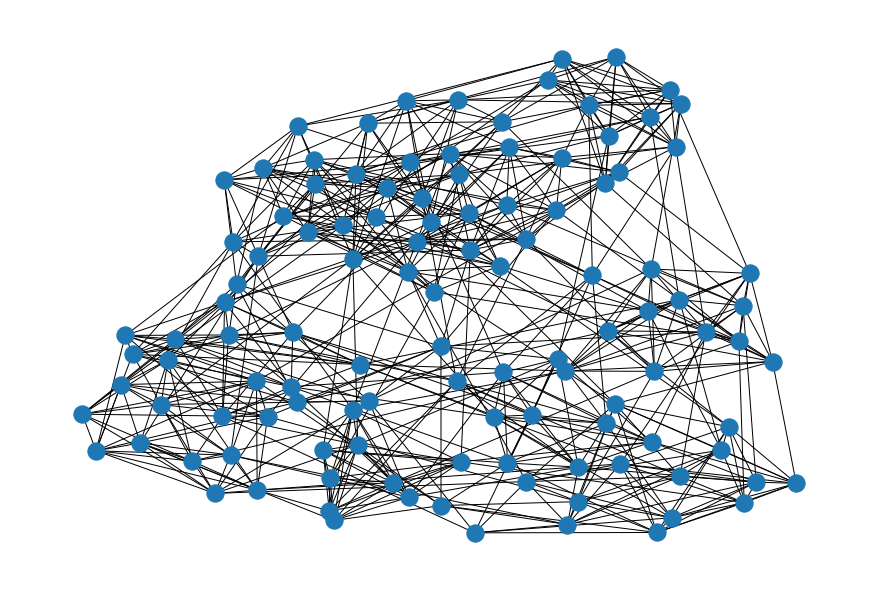

In [47]:
#plot the train graph 
plt.figure(figsize=(12,8))
nx.draw(G)

# print the edge information

In [48]:
edge_subset_size = len(list(edge_subset))
print("Deleted : ", str(edge_subset_size))
print("Remaining : ", str((m - edge_subset_size)))

Deleted :  153
Remaining :  460


In [49]:
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
score, label = zip(*[(s, (u,v) in edge_subset or (v,u) in edge_subset) for (u,v,s) in prediction_jaccard])

In [55]:
# create a dataframe,and draw the roc curve
def get_df(score,label):
    df=pd.DataFrame({'score':list(score),'label':list(label)})
    df['label']=df['label'].apply(lambda x: int(x))
    return df

Jaccard_df=get_df(score,label)
Jaccard_df

,score,label
0,0.052632,0
1,0.000000,0
2,0.000000,0
3,0.047619,0
4,0.055556,0
...,...,...
6090,0.142857,0
6091,0.000000,0
6092,0.062500,0
6093,0.000000,0


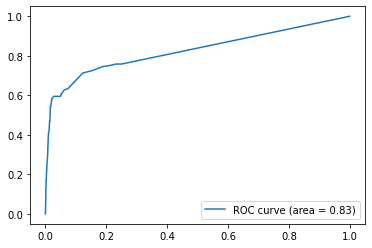

In [58]:
# start to paint the roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score as AUC
def plot_roc(df):
    # calculate the FPR(false positive) and Recall(real positive)
    FPR,recall,thresholds = roc_curve(df['label'],df['score'])
    # calculate the area of the AUC
    area=AUC(df['label'],df['score'])
    # plot roc curve
    plt.figure()
    plt.plot(FPR,recall,label='ROC curve (area = %0.2f)'%area)
    plt.legend(loc='lower right')
    plt.show()

plot_roc(Jaccard_df)